# Analysis of Tennis times

## Data acquisition and wrangling
#### The first set of data is retrieved from the GitHub repo of fivethirtyeight: https://github.com/fivethirtyeight/data/tree/master/tennis-time
#### This data contains 3 files as imported below.

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#input file 1

events_time=pd.read_csv("events_time.txt")
events_time.head(10)

,tournament,surface,seconds_added_per_point,years
0,Wimbledon,Grass,-2.98,1991-2014
1,London Olympics,Grass,-2.62,2012
2,Manchester,Grass,-2.33,1991-1994
3,Eastbourne,Grass,-1.78,2009-2014
4,Birmingham,Carpet,-1.63,1991
5,Queen's Club,Grass,-1.50,1991-2014
6,Lyon,Hard,-1.35,2009
7,Las Vegas,Hard,-1.32,2006-2008
8,Stockholm Masters,Carpet,-0.90,1991-1994
9,Nottingham,Grass,-0.82,1995-2008


In [4]:
events_time.describe(include='all')

,tournament,surface,seconds_added_per_point,years
count,205,205,205.000000,205
unique,173,4,NaN,106
top,London,Hard,NaN,1991-2014
freq,2,86,NaN,17
mean,NaN,NaN,1.761805,NaN
std,NaN,NaN,1.600261,NaN
min,NaN,NaN,-2.980000,NaN
25%,NaN,NaN,0.730000,NaN
50%,NaN,NaN,1.630000,NaN
75%,NaN,NaN,2.920000,NaN


In [5]:
#input file 2

players_time=pd.read_csv("players_time.txt")
players_time.head(20)

,player,seconds_added_per_point
0,Dustin Brown,-6.37
1,Rohan Bopanna,-4.95
2,Chris Guccione,-4.63
3,Benoit Paire,-4.56
4,Lukas Dlouhy,-4.35
5,Brendan Evans,-4.25
6,Igor Sijsling,-4.19
7,Lukas Rosol,-4.13
8,Alexander Kudryavtsev,-4.05
9,Sam Querrey,-3.99


In [85]:
#input file 3

serve_times=pd.read_csv("serve_times.txt")
serve_times.head(10)

,server,seconds_before_next_point,day,opponent,game_score,set,game
0,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0
1,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0
2,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0
3,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0
4,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0
5,Pablo Andujar,34,28-May-15,Philipp Kohlschreiber,40-30,5,2-4
6,Bernard Tomic,21,28-May-15,Thanasi Kokkinakis,30-40,3,0-1
7,Bernard Tomic,17,28-May-15,Thanasi Kokkinakis,Deuce,3,0-1
8,Bernard Tomic,17,28-May-15,Thanasi Kokkinakis,Ad-in,3,0-1
9,Rafael Nadal,34,28-May-15,Nicolas Almagro,15-30,1,0-1


#### Sourced data from a second source to know more about the players information such as age, nationality and ranking over the years.

#### The below two files were sourced from: https://datahub.io/sports-data/atp-world-tour-tennis-data#resource-rankings_1973-2017

In [7]:
#input file 4

players_bk=pd.read_csv("player_overviews_unindexed_csv.csv")
players_bk.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [8]:
#input file 5

players_ranking=pd.read_csv("rankings_1973-2017_csv.csv", low_memory=False)
players_ranking.head(10)

,week_title,week_year,week_month,week_day,rank_text,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69
5,2017.11.20,2017,11,20,6,6,1.0,down,29.0,3805,22,/en/players/marin-cilic/c977/overview,marin-cilic,c977
6,2017.11.20,2017,11,20,7,7,1.0,up,26.0,3775,26,/en/players/david-goffin/gb88/overview,david-goffin,gb88
7,2017.11.20,2017,11,20,8,8,1.0,up,25.0,3165,22,/en/players/jack-sock/sm25/overview,jack-sock,sm25
8,2017.11.20,2017,11,20,9,9,2.0,down,32.0,3150,15,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367
9,2017.11.20,2017,11,20,10,10,NaN,NaN,26.0,2615,25,/en/players/pablo-carreno%20busta/cd85/overview,pablo-carreno%20busta,cd85


In [9]:
# for ease of computation, we pull the rank of a player for each year as the avergae rank held in that year

#players_ranking.loc[players_ranking['player_id']=='n409'].sort_values(by=['week_year', 'week_month'], ascending=False)
#players_ranking.columns

# keep relevant columns from file 5
ranks=players_ranking[['week_year','rank_number', 'move_positions', 'move_direction', 'player_age','ranking_points',
                  'tourneys_played','player_id']]
ranks.shape

(2694539, 8)

In [10]:
# aggregation of different yearly records for each player including rank

ranks2=ranks.groupby(['player_id','week_year'], as_index=False).agg({'player_age':'max','tourneys_played':'max', 'ranking_points':'max','rank_number':'min'})
ranks2['rank_number']=ranks2.rank_number.round()

# check by displaying the details for Nadal
ranks2.loc[ranks2['player_id']=='n409']

,player_id,week_year,player_age,tourneys_played,ranking_points,rank_number
48483,n409,2001,15.0,2,11,811
48484,n409,2002,16.0,14,165,200
48485,n409,2003,17.0,25,806,45
48486,n409,2004,18.0,24,978,34
48487,n409,2005,19.0,26,4940,2
48488,n409,2006,20.0,24,5125,2
48489,n409,2007,21.0,20,5735,2
48490,n409,2008,22.0,21,7100,1
48491,n409,2009,23.0,20,15390,1
48492,n409,2010,24.0,21,12450,1


In [11]:
players_bk.columns

Index(['player_id', 'player_slug', 'first_name', 'last_name', 'player_url',
       'flag_code', 'residence', 'birthplace', 'birthdate', 'birth_year',
       'birth_month', 'birth_day', 'turned_pro', 'weight_lbs', 'weight_kg',
       'height_ft', 'height_inches', 'height_cm', 'handedness', 'backhand'],
      dtype='object')

In [12]:
# keep relevant columns in back ground file (file 4) for players

players_info=players_bk[['player_id','first_name','last_name','flag_code','birth_year','turned_pro','weight_lbs','height_cm','handedness','backhand']]
players_info

,player_id,first_name,last_name,flag_code,birth_year,turned_pro,weight_lbs,height_cm,handedness,backhand
0,a002,Ricardo,Acuna,CHI,1958.0,0.0,150.0,175.0,NaN,NaN
1,a001,Sadiq,Abdullahi,NGR,1960.0,0.0,0.0,0.0,NaN,NaN
2,a005,Nelson,Aerts,BRA,1963.0,0.0,165.0,188.0,NaN,NaN
3,a004,Egan,Adams,USA,1959.0,0.0,160.0,178.0,NaN,NaN
4,a006,Ronald,Agenor,USA,1964.0,1983.0,180.0,180.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10907,z435,A.,Zorab,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10908,z437,J.,Zimmermann,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10909,z436,G.,Zinn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10910,z440,C.,Zenger,GER,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#players_info.handedness.isnull().sum()
#players_info.backhand.isnull().sum()

#since we have 9,776 rows missing for handedness and backhand, we drop these columns as well
players_info.drop(['handedness','backhand'], axis=1, inplace=True)
players_info

C:\Users\aditi\Anaconda3_3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,player_id,first_name,last_name,flag_code,birth_year,turned_pro,weight_lbs,height_cm
0,a002,Ricardo,Acuna,CHI,1958.0,0.0,150.0,175.0
1,a001,Sadiq,Abdullahi,NGR,1960.0,0.0,0.0,0.0
2,a005,Nelson,Aerts,BRA,1963.0,0.0,165.0,188.0
3,a004,Egan,Adams,USA,1959.0,0.0,160.0,178.0
4,a006,Ronald,Agenor,USA,1964.0,1983.0,180.0,180.0
...,...,...,...,...,...,...,...,...
10907,z435,A.,Zorab,NaN,NaN,NaN,NaN,NaN
10908,z437,J.,Zimmermann,NaN,NaN,NaN,NaN,NaN
10909,z436,G.,Zinn,NaN,NaN,NaN,NaN,NaN
10910,z440,C.,Zenger,GER,NaN,NaN,NaN,NaN


In [14]:
# check for other missing information
players_info.isnull().sum()
# we note a high number of missing values for turned_pro, height and weight (thus, omit these from our analysis)

player_id        0
first_name       0
last_name        0
flag_code     2185
birth_year    5798
turned_pro    9379
weight_lbs    8206
height_cm     8254
dtype: int64

In [15]:
# check
players_info.loc[players_info['player_id']=='n409']

,player_id,first_name,last_name,flag_code,birth_year,turned_pro,weight_lbs,height_cm
7000,n409,Rafael,Nadal,ESP,1986.0,2001.0,188.0,185.0


In [16]:
# create a new column in file 5- 'full name' for future merges with files 1,2,3
players_info['full_name']=players_info['first_name']+" "+players_info['last_name']
players_info

C:\Users\aditi\Anaconda3_3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player_id,first_name,last_name,flag_code,birth_year,turned_pro,weight_lbs,height_cm,full_name
0,a002,Ricardo,Acuna,CHI,1958.0,0.0,150.0,175.0,Ricardo Acuna
1,a001,Sadiq,Abdullahi,NGR,1960.0,0.0,0.0,0.0,Sadiq Abdullahi
2,a005,Nelson,Aerts,BRA,1963.0,0.0,165.0,188.0,Nelson Aerts
3,a004,Egan,Adams,USA,1959.0,0.0,160.0,178.0,Egan Adams
4,a006,Ronald,Agenor,USA,1964.0,1983.0,180.0,180.0,Ronald Agenor
...,...,...,...,...,...,...,...,...,...
10907,z435,A.,Zorab,NaN,NaN,NaN,NaN,NaN,A. Zorab
10908,z437,J.,Zimmermann,NaN,NaN,NaN,NaN,NaN,J. Zimmermann
10909,z436,G.,Zinn,NaN,NaN,NaN,NaN,NaN,G. Zinn
10910,z440,C.,Zenger,GER,NaN,NaN,NaN,NaN,C. Zenger


In [17]:
# Keeping only relevant columns in players_info
players_info2=players_info[['player_id','full_name','flag_code']]
players_info2.head()

,player_id,full_name,flag_code
0,a002,Ricardo Acuna,CHI
1,a001,Sadiq Abdullahi,NGR
2,a005,Nelson Aerts,BRA
3,a004,Egan Adams,USA
4,a006,Ronald Agenor,USA


In [18]:
# merge the players' information (nationality) and their rankings (file 4 & 5)

player_details=pd.merge(ranks2, players_info2, how='left', on='player_id')

# check
player_details.loc[player_details['player_id']=='n409']

,player_id,week_year,player_age,tourneys_played,ranking_points,rank_number,full_name,flag_code
48483,n409,2001,15.0,2,11,811,Rafael Nadal,ESP
48484,n409,2002,16.0,14,165,200,Rafael Nadal,ESP
48485,n409,2003,17.0,25,806,45,Rafael Nadal,ESP
48486,n409,2004,18.0,24,978,34,Rafael Nadal,ESP
48487,n409,2005,19.0,26,4940,2,Rafael Nadal,ESP
48488,n409,2006,20.0,24,5125,2,Rafael Nadal,ESP
48489,n409,2007,21.0,20,5735,2,Rafael Nadal,ESP
48490,n409,2008,22.0,21,7100,1,Rafael Nadal,ESP
48491,n409,2009,23.0,20,15390,1,Rafael Nadal,ESP
48492,n409,2010,24.0,21,12450,1,Rafael Nadal,ESP


## Exploratory Data Analysis

In [19]:
top_25_ever=player_details.groupby(['player_id','full_name','flag_code'], as_index=False).agg({'week_year':['count'],'player_age':['mean'],'tourneys_played':['sum'],'ranking_points':['sum'],'rank_number':['min']}).sort_values(by=('rank_number','min')).head(25)
top_25_ever

,player_id,full_name,flag_code,week_year,player_age,tourneys_played,ranking_points,rank_number
,,,,count,mean,sum,sum,min
2743,m605,Carlos Moya,ESP,18,26.444444,389,30205,1
614,c044,Jimmy Connors,USA,24,33.125000,2,0,1
1103,e004,Stefan Edberg,SWE,15,23.933333,51,3157,1
2952,n008,Ilie Nastase,ROU,14,34.357143,0,0,1
1020,d643,Novak Djokovic,SRB,15,23.000000,280,131324,1
3034,n409,Rafael Nadal,ESP,17,23.000000,346,126760,1
2577,m099,Thomas Muster,AUT,20,27.750000,151,11860,1
2120,k267,Yevgeny Kafelnikov,RUS,13,24.000000,266,25494,1
2124,k293,Gustavo Kuerten,BRA,17,24.941176,267,25156,1


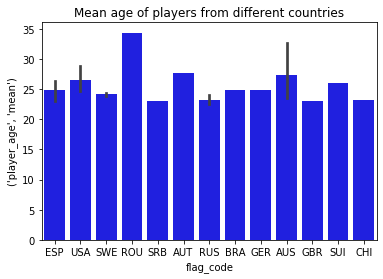

In [20]:
sns.barplot('flag_code',('player_age', 'mean'), data=top_25_ever, color='b')
plt.title("Mean age of players from different countries")
plt.show()

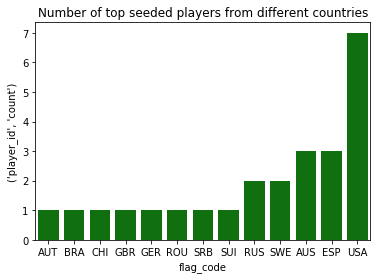

In [21]:
topPlayers_country=top_25_ever.groupby('flag_code', as_index=False).agg({'player_id':['count']}).sort_values(by=('player_id', 'count'))
sns.barplot('flag_code', ('player_id', 'count'), data=topPlayers_country, color='g')
plt.title("Number of top seeded players from different countries")
plt.show()

#### USA has produced the highest number of players that have ranked 1 atleast once in their careers. Spain and Australia have produced the second highest number of top seeded players.

In [22]:
top_5_2017=player_details.loc[player_details['week_year']==2017].sort_values(by='rank_number').head(5)
top_5_2017['points_per_tourn']=round(top_5_2017['ranking_points']/top_5_2017['tourneys_played'],2)
top_5_2017

,player_id,week_year,player_age,tourneys_played,ranking_points,rank_number,full_name,flag_code,points_per_tourn
44833,mc10,2017,30.0,19,12560,1,Andy Murray,GBR,661.05
48499,n409,2017,31.0,18,10645,1,Rafael Nadal,ESP,591.39
16565,d643,2017,30.0,17,11780,2,Novak Djokovic,SRB,692.94
20754,f324,2017,36.0,17,9605,2,Roger Federer,SUI,565.00
17078,d875,2017,26.0,25,5150,3,Grigor Dimitrov,BUL,206.00


In [23]:
import altair as alt
alt.Chart(top_5_2017).mark_point().encode(
   x='player_age',
   y='ranking_points',
   color='full_name'
)

alt.Chart(...)

### In 2017...
#### Andy and Novak have played almost similar number of matches, are of same age and have the most number of points
#### Roger Federer has played same number of matches as Djokovic, is the eldest of the top 5 players and is running 4th in terms of points
#### Dimitrov needs to improve his game as we see that he has played the maximum tournaments however, has the least number of points
#### Nadal continues to be strong in terms of points and rank

# --------------------------------------------------------------------------------------------------------------

#### Using Events time (file 1) plot and compare the seconds added per point across the tournaments for different types of courts

In [24]:
events_time.loc[events_time['surface']=='Grass']

,tournament,surface,seconds_added_per_point,years
0,Wimbledon,Grass,-2.98,1991-2014
1,London Olympics,Grass,-2.62,2012
2,Manchester,Grass,-2.33,1991-1994
3,Eastbourne,Grass,-1.78,2009-2014
5,Queen's Club,Grass,-1.50,1991-2014
9,Nottingham,Grass,-0.82,1995-2008
12,Halle,Grass,-0.58,1993-2014
14,s-Hertogenbosch,Grass,-0.54,2008-2014
19,Newport,Grass,-0.35,1991-2014
26,Rosmalen,Grass,0.17,1991-1997


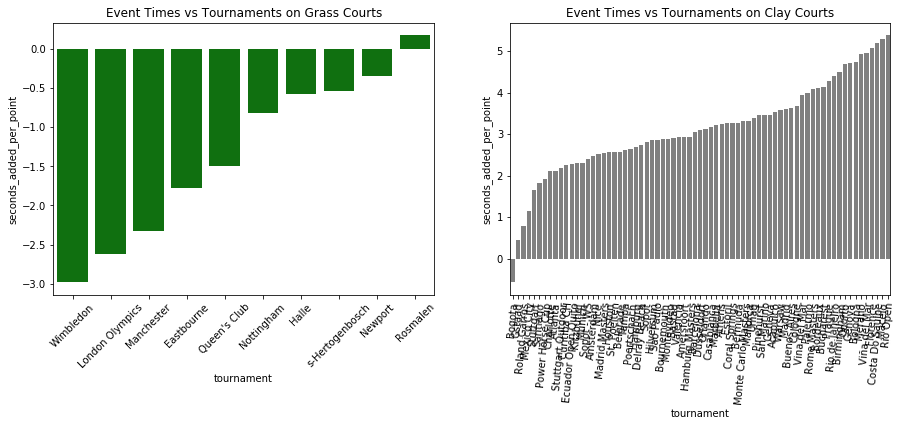

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

x1=sns.barplot('tournament', 'seconds_added_per_point', data=events_time.loc[events_time['surface']=='Grass'], ax=ax[0], color='green')
x1.set_xticklabels(x1.get_xticklabels(), rotation=45)
ax[0].set_title("Event Times vs Tournaments on Grass Courts")

x2=sns.barplot('tournament', 'seconds_added_per_point', data=events_time.loc[events_time['surface']=='Clay'], ax=ax[1], color='grey')
x2.set_xticklabels(x2.get_xticklabels(), rotation=85)
ax[1].set_title("Event Times vs Tournaments on Clay Courts");

''

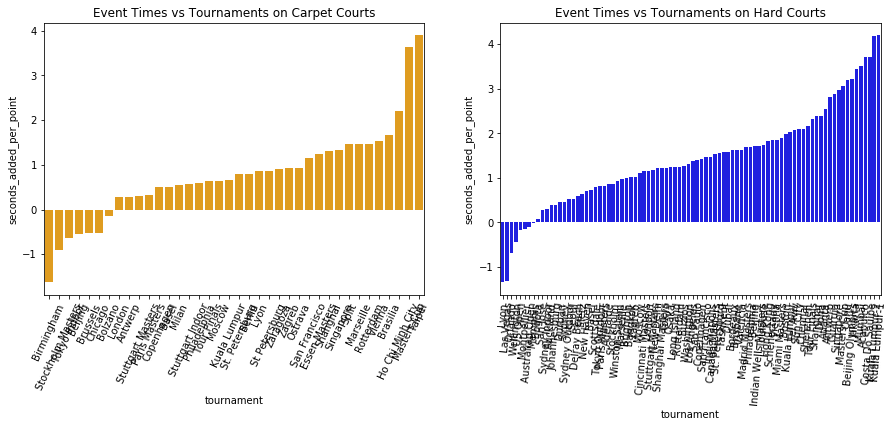

In [26]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

x3=sns.barplot('tournament', 'seconds_added_per_point', data=events_time.loc[events_time['surface']=='Carpet'], ax=ax[0], color='orange')
x3.set_xticklabels(x3.get_xticklabels(), rotation=65)
ax[0].set_title("Event Times vs Tournaments on Carpet Courts")

x4=sns.barplot('tournament', 'seconds_added_per_point', data=events_time.loc[events_time['surface']=='Hard'], ax=ax[1], color='blue')
x4.set_xticklabels(x4.get_xticklabels(), rotation=85)
ax[1].set_title("Event Times vs Tournaments on Hard Courts")
;

### We observe that the most of the matches are quicker on grass courts while the longest matches occur on clay courts

In [27]:
# Top 10 tournaments that see the longest matches

events_time.sort_values(by='seconds_added_per_point',ascending=False).head(10)

,tournament,surface,seconds_added_per_point,years
204,Rio Open,Clay,5.38,2015
203,Maceio,Clay,5.28,1992
202,Costa Do Sauipe,Clay,5.19,2004-2011
201,Florence,Clay,5.08,1991-1994
200,Viña del Mar,Clay,4.96,2009
199,Merano,Clay,4.93,1999
198,Bologna,Clay,4.74,1991-1998
197,Genova,Clay,4.71,1991-1993
196,Oporto,Clay,4.69,1995-1996
195,Birmingham,Clay,4.49,1994


In [28]:
# Top 10 Quickest tournaments

events_time.sort_values(by='seconds_added_per_point',ascending=True).head(10)

,tournament,surface,seconds_added_per_point,years
0,Wimbledon,Grass,-2.98,1991-2014
1,London Olympics,Grass,-2.62,2012
2,Manchester,Grass,-2.33,1991-1994
3,Eastbourne,Grass,-1.78,2009-2014
4,Birmingham,Carpet,-1.63,1991
5,Queen's Club,Grass,-1.50,1991-2014
6,Lyon,Hard,-1.35,2009
7,Las Vegas,Hard,-1.32,2006-2008
8,Stockholm Masters,Carpet,-0.90,1991-1994
9,Nottingham,Grass,-0.82,1995-2008


### Using Players_time (file 2)

In [29]:
nationality=player_details[['full_name','flag_code']].drop_duplicates()
#nationality

In [30]:
# Merge to learn the nationalities of the players

players_time_flag=pd.merge(players_time, nationality, left_on='player', right_on='full_name', how='inner')
players_time_flag

,player,seconds_added_per_point,full_name,flag_code
0,Dustin Brown,-6.37,Dustin Brown,GER
1,Rohan Bopanna,-4.95,Rohan Bopanna,IND
2,Chris Guccione,-4.63,Chris Guccione,AUS
3,Benoit Paire,-4.56,Benoit Paire,FRA
4,Lukas Dlouhy,-4.35,Lukas Dlouhy,CZE
...,...,...,...,...
203,T.J. Middleton,5.60,T.J. Middleton,USA
204,Martin Stringari,5.68,Martin Stringari,ARG
205,Rafael Nadal,5.92,Rafael Nadal,ESP
206,Nicolas Massu,6.21,Nicolas Massu,CHI


In [31]:
# Top 10 Quickest players of all times

players_time_flag.sort_values(by='seconds_added_per_point',ascending=True).head(10)

,player,seconds_added_per_point,full_name,flag_code
0,Dustin Brown,-6.37,Dustin Brown,GER
1,Rohan Bopanna,-4.95,Rohan Bopanna,IND
2,Chris Guccione,-4.63,Chris Guccione,AUS
3,Benoit Paire,-4.56,Benoit Paire,FRA
4,Lukas Dlouhy,-4.35,Lukas Dlouhy,CZE
5,Brendan Evans,-4.25,Brendan Evans,USA
6,Igor Sijsling,-4.19,Igor Sijsling,NED
7,Lukas Rosol,-4.13,Lukas Rosol,CZE
8,Alexander Kudryavtsev,-4.05,Alexander Kudryavtsev,RUS
9,Sam Querrey,-3.99,Sam Querrey,USA


In [32]:
# Top 10 Slowest players of all times

players_time_flag.sort_values(by='seconds_added_per_point',ascending=False).head(10)

,player,seconds_added_per_point,full_name,flag_code
207,Emanuel Couto,6.35,Emanuel Couto,POR
206,Nicolas Massu,6.21,Nicolas Massu,CHI
205,Rafael Nadal,5.92,Rafael Nadal,ESP
204,Martin Stringari,5.68,Martin Stringari,ARG
203,T.J. Middleton,5.60,T.J. Middleton,USA
202,Lucas Arnold Ker,5.35,Lucas Arnold Ker,ARG
201,John McEnroe,5.22,John McEnroe,USA
200,Julian Knowle,5.15,Julian Knowle,AUT
199,Michael Chang,4.94,Michael Chang,USA
198,Andrei Cherkasov,4.92,Andrei Cherkasov,RUS


In [33]:
# average player time vs nationalities

avg_times=players_time_flag.groupby(['flag_code'], as_index=False).agg({'seconds_added_per_point':['median']}).sort_values(by=[('seconds_added_per_point', 'median')])
avg_times['median_secs_added_per_point']=avg_times[('seconds_added_per_point', 'median')]
avg_times.drop([('seconds_added_per_point', 'median')], axis=1, inplace=True)
avg_times

,flag_code,median_secs_added_per_point
,,
20,IND,-4.950
7,CAN,-2.540
11,CZE,-2.345
24,LTU,-2.300
5,BIH,-2.090
15,FIN,-1.760
4,BEL,-1.740
26,NED,-1.635
2,AUS,-0.630


In [86]:
# create year as a separate column in serve time (file)

import datetime

def extract_year(row):
    year=datetime.datetime.strptime(row['day'],'%d-%b-%y').strftime('%Y')
    return (year)

def extract_month(row):
    month=datetime.datetime.strptime(row['day'],'%d-%b-%y').strftime('%m')
    return (month)

def extract_day(row):
    day=datetime.datetime.strptime(row['day'],'%d-%b-%y').strftime('%d')
    return (day)

serve_times['year']=serve_times.apply(extract_year, axis=1)   
serve_times['month']=serve_times.apply(extract_month, axis=1) 
serve_times['day2']=serve_times.apply(extract_day, axis=1) 

In [87]:
serve_times.head()

,server,seconds_before_next_point,day,opponent,game_score,set,game,year,month,day2
0,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0,2015,05,28
1,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0,2015,05,28
2,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0,2015,05,28
3,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0,2015,05,28
4,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0,2015,05,28


In [88]:
# merge data files

# 1. players' details in 2015
player_details_2015=player_details.loc[player_details['week_year']==2015]

#2. serve times
base=pd.merge(player_details_2015, serve_times, left_on='full_name', right_on='server', how='inner')
print(base.shape)
base.head(10)

(114, 18)


,player_id,week_year,player_age,tourneys_played,ranking_points,rank_number,full_name,flag_code,server,seconds_before_next_point,day,opponent,game_score,set,game,year,month,day2
0,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0,2015,05,28
1,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0,2015,05,28
2,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0,2015,05,28
3,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0,2015,05,28
4,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0,2015,05,28
5,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-0,1,1-3,2015,05,28
6,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,24,28-May-15,Rafael Nadal,30-0,1,1-3,2015,05,28
7,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,22,28-May-15,Rafael Nadal,40-0,1,1-3,2015,05,28
8,a479,2015,30.0,23,710,67,Nicolas Almagro,ESP,Nicolas Almagro,20,28-May-15,Rafael Nadal,30-40,2,3-5,2015,05,28
9,a596,2015,29.0,31,1205,32,Pablo Andujar,ESP,Pablo Andujar,34,28-May-15,Philipp Kohlschreiber,40-30,5,2-4,2015,05,28


In [89]:
# 3. further merge with player times
base2=pd.merge(base, players_time, left_on='server', right_on='player', how='inner')

base2.drop(['full_name','player'], axis=1, inplace=True)
print(base2.shape)
base2.head(10)

(114, 18)


,player_id,week_year,player_age,tourneys_played,ranking_points,rank_number,flag_code,server,seconds_before_next_point,day,opponent,game_score,set,game,year,month,day2,seconds_added_per_point
0,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0,2015,05,28,-2.01
1,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0,2015,05,28,-2.01
2,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0,2015,05,28,-2.01
3,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0,2015,05,28,-2.01
4,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0,2015,05,28,-2.01
5,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-0,1,1-3,2015,05,28,-2.01
6,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,24,28-May-15,Rafael Nadal,30-0,1,1-3,2015,05,28,-2.01
7,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,22,28-May-15,Rafael Nadal,40-0,1,1-3,2015,05,28,-2.01
8,a479,2015,30.0,23,710,67,ESP,Nicolas Almagro,20,28-May-15,Rafael Nadal,30-40,2,3-5,2015,05,28,-2.01
9,a596,2015,29.0,31,1205,32,ESP,Pablo Andujar,34,28-May-15,Philipp Kohlschreiber,40-30,5,2-4,2015,05,28,2.00


In [90]:
base2.describe(include='all')

,player_id,week_year,player_age,tourneys_played,ranking_points,rank_number,flag_code,server,seconds_before_next_point,day,opponent,game_score,set,game,year,month,day2,seconds_added_per_point
count,114,114.0,114.000000,114.000000,114.000000,114.000000,114,114,114.000000,114,114,114,114.000000,114,114,114,114,114.000000
unique,14,NaN,NaN,NaN,NaN,NaN,11,14,NaN,3,14,17,NaN,19,1,1,3,NaN
top,ke17,NaN,NaN,NaN,NaN,NaN,AUS,Nick Kyrgios,NaN,28-May-15,Andy Murray,Deuce,NaN,0-1,2015,05,28,NaN
freq,19,NaN,NaN,NaN,NaN,NaN,26,19,NaN,60,19,17,NaN,14,114,114,60,NaN
mean,NaN,2015.0,27.052632,24.236842,3948.473684,25.587719,NaN,NaN,20.315789,NaN,NaN,NaN,2.596491,NaN,NaN,NaN,NaN,-0.782895
std,NaN,0.0,4.927514,4.436978,4311.178112,22.984339,NaN,NaN,6.950286,NaN,NaN,NaN,1.070268,NaN,NaN,NaN,NaN,3.257985
min,NaN,2015.0,19.000000,19.000000,663.000000,1.000000,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-4.560000
25%,NaN,2015.0,23.000000,20.000000,1205.000000,2.000000,NaN,NaN,15.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,-3.150000
50%,NaN,2015.0,28.000000,23.000000,1340.000000,25.000000,NaN,NaN,19.500000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,-2.430000
75%,NaN,2015.0,30.000000,29.750000,8945.000000,32.000000,NaN,NaN,24.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.530000


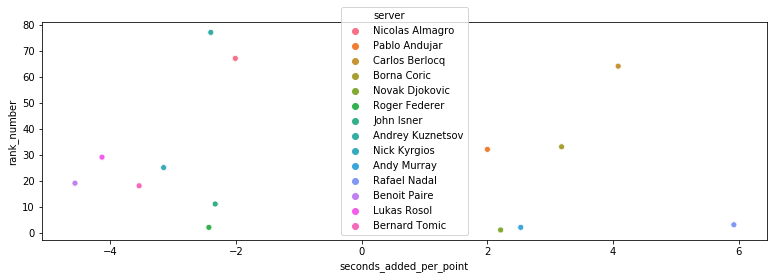

In [91]:
plt.figure(figsize=(13,4))
sns.scatterplot('seconds_added_per_point','rank_number', hue='server', data=base2)
plt.show()

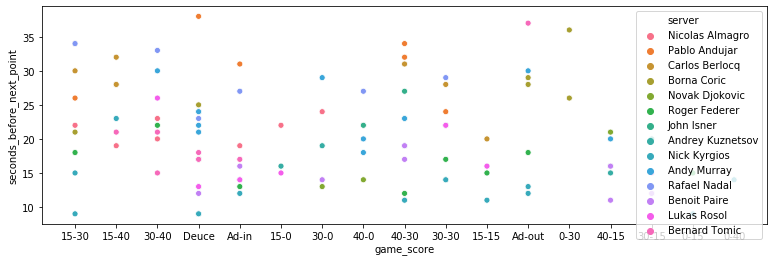

In [92]:
plt.figure(figsize=(13,4))
sns.scatterplot('game_score','seconds_before_next_point', hue='server', data=base2)
plt.show()

## Modeling

In [94]:
base2.columns

Index(['player_id', 'week_year', 'player_age', 'tourneys_played',
       'ranking_points', 'rank_number', 'flag_code', 'server',
       'seconds_before_next_point', 'day', 'opponent', 'game_score', 'set',
       'game', 'year', 'month', 'day2', 'seconds_added_per_point'],
      dtype='object')

In [102]:
base3=base2[['player_age', 'tourneys_played',
       'ranking_points', 'rank_number', 'seconds_before_next_point', 'game_score', 'set','day2', 'seconds_added_per_point']]

In [104]:
# convert categorical vars to dummies
cat_vars=['game_score','day2']
base_train=pd.get_dummies(base3, columns=cat_vars,drop_first=True)
base_train.head()

,player_age,tourneys_played,ranking_points,rank_number,seconds_before_next_point,set,seconds_added_per_point,game_score_0-30,game_score_0-40,game_score_15-0,...,game_score_30-30,game_score_30-40,game_score_40-0,game_score_40-15,game_score_40-30,game_score_Ad-in,game_score_Ad-out,game_score_Deuce,day2_29,day2_30
0,30.0,23,710,67,22,1,-2.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,23,710,67,19,1,-2.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.0,23,710,67,23,1,-2.01,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,30.0,23,710,67,24,1,-2.01,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,30.0,23,710,67,19,1,-2.01,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
base_train.describe()

,player_age,tourneys_played,ranking_points,rank_number,seconds_before_next_point,set,seconds_added_per_point,game_score_0-30,game_score_0-40,game_score_15-0,...,game_score_30-30,game_score_30-40,game_score_40-0,game_score_40-15,game_score_40-30,game_score_Ad-in,game_score_Ad-out,game_score_Deuce,day2_29,day2_30
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,27.052632,24.236842,3948.473684,25.587719,20.315789,2.596491,-0.782895,0.017544,0.008772,0.035088,...,0.078947,0.070175,0.052632,0.052632,0.096491,0.078947,0.061404,0.149123,0.307018,0.166667
std,4.927514,4.436978,4311.178112,22.984339,6.950286,1.070268,3.257985,0.131866,0.093659,0.184814,...,0.270847,0.256570,0.224283,0.224283,0.296567,0.270847,0.241129,0.357782,0.463293,0.374323
min,19.000000,19.000000,663.000000,1.000000,9.000000,1.000000,-4.560000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,1205.000000,2.000000,15.000000,2.000000,-3.150000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,23.000000,1340.000000,25.000000,19.500000,3.000000,-2.430000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,29.750000,8945.000000,32.000000,24.000000,3.000000,2.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,34.000000,31.000000,16785.000000,77.000000,38.000000,5.000000,5.920000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
y=base_train['seconds_before_next_point']
X=base_train.drop(['seconds_before_next_point'], axis=1)

In [71]:
#y.shape

In [151]:
#train- test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y,test_size=0.30, random_state=1349)

In [76]:
#Xtest.shape

In [184]:
# Model 1. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

clf_gini = DecisionTreeClassifier(max_depth=5) 
  
# Performing training 
clf_gini.fit(Xtrain,ytrain)
clf_gini.score(Xtest,ytest)
clf_gini.predict(Xtest)

print('\n Mean squared error: %.2f \n', mean_squared_error(ytest, pred))


 Mean squared error: %.2f 
 31.40335692547792


In [185]:
# Model 2. Linear Regression
from sklearn.linear_model import LinearRegression
linreg=LinearRegression().fit(Xtrain, ytrain)
pred=linreg.predict(Xtest)

print("Coefficients:", linreg.coef_)
print("\n Intercpet:", linreg.intercept_)

print('\n Mean squared error: %.2f \n', mean_squared_error(ytest, pred))
print("\n R-squared:",linreg.score(Xtest,ytest))

Coefficients: [ 6.14476531e-01 -7.94703883e-02 -8.39139273e-04 -8.08163814e-02
  1.11129065e+00  1.05194188e+00  1.13153668e+01  2.68612898e+00
  2.73390959e+00  1.70463052e-02  1.87307130e+00  3.81445403e+00
  7.30251157e+00  2.03629537e+00  1.93004585e+00  5.36489580e+00
 -2.58907270e-01  3.18750942e+00  5.39291637e+00  2.00903804e+00
  1.30202769e+01  2.79106142e+00 -4.06760968e+00 -3.61747562e+00]

 Intercpet: 7.355824913534406

 Mean squared error: %.2f 
 27.28654518798698

 R-squared: 0.4813973088515211


In [154]:
# Model 3 using sm api
import statsmodels.api as sm
Xtrain_const = sm.add_constant(Xtrain) # adding a constant

model = sm.OLS(ytrain, Xtrain_const).fit()
predictions = model.predict(Xtrain_const) 

print_model = model.summary()
print(print_model)

                                OLS Regression Results                               
Dep. Variable:     seconds_before_next_point   R-squared:                       0.767
Model:                                   OLS   Adj. R-squared:                  0.664
Method:                        Least Squares   F-statistic:                     7.420
Date:                       Sun, 19 Apr 2020   Prob (F-statistic):           5.91e-10
Time:                               13:56:41   Log-Likelihood:                -205.52
No. Observations:                         79   AIC:                             461.0
Df Residuals:                             54   BIC:                             520.3
Df Model:                                 24                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

C:\Users\aditi\Anaconda3_3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [155]:
Xtrain_const.columns

Index(['const', 'player_age', 'tourneys_played', 'ranking_points',
       'rank_number', 'set', 'seconds_added_per_point', 'game_score_0-30',
       'game_score_0-40', 'game_score_15-0', 'game_score_15-15',
       'game_score_15-30', 'game_score_15-40', 'game_score_30-0',
       'game_score_30-15', 'game_score_30-30', 'game_score_30-40',
       'game_score_40-0', 'game_score_40-15', 'game_score_40-30',
       'game_score_Ad-in', 'game_score_Ad-out', 'game_score_Deuce', 'day2_29',
       'day2_30'],
      dtype='object')

In [160]:
# keep statistically significant variables only

Xtrain_new=Xtrain_const[[ 'player_age', 'ranking_points','set', 'seconds_added_per_point', 'game_score_0-30', 
                         'game_score_Ad-out', 'day2_29']]

In [176]:
#check for corelation
correlation=Xtrain_new.corr()
round(correlation,2)

,player_age,ranking_points,set,seconds_added_per_point,game_score_0-30,game_score_Ad-out,day2_29
player_age,1.00,0.44,-0.01,0.12,-0.26,-0.22,0.53
ranking_points,0.44,1.00,-0.04,0.25,-0.10,-0.03,0.17
set,-0.01,-0.04,1.00,0.12,0.06,-0.12,0.05
seconds_added_per_point,0.12,0.25,0.12,1.00,0.20,0.15,-0.34
game_score_0-30,-0.26,-0.10,0.06,0.20,1.00,-0.04,-0.10
game_score_Ad-out,-0.22,-0.03,-0.12,0.15,-0.04,1.00,-0.15
day2_29,0.53,0.17,0.05,-0.34,-0.10,-0.15,1.00


In [186]:
# Model 4 after filtering for insignificant variables
model2 = sm.OLS(ytrain, Xtrain_new).fit()
predictions = model2.predict(Xtrain_new) 

print_model = model2.summary()
print(print_model)

                                    OLS Regression Results                                    
Dep. Variable:     seconds_before_next_point   R-squared (uncentered):                   0.968
Model:                                   OLS   Adj. R-squared (uncentered):              0.964
Method:                        Least Squares   F-statistic:                              307.4
Date:                       Sun, 19 Apr 2020   Prob (F-statistic):                    5.65e-51
Time:                               14:26:43   Log-Likelihood:                         -218.96
No. Observations:                         79   AIC:                                      451.9
Df Residuals:                             72   BIC:                                      468.5
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
                              coef    std err     

In [187]:
Xtest_new=Xtest[[ 'player_age', 'ranking_points','set', 'seconds_added_per_point', 'game_score_0-30', 
                         'game_score_Ad-out', 'day2_29']]

In [188]:
predictions = model2.predict(Xtest_new)
print('\n Mean squared error: %.2f \n', mean_squared_error(ytest, predictions))


 Mean squared error: %.2f 
 33.35214533137029


### We choose Model 2 employing OLS as it has the least Out of sample MSE.